<a href="https://colab.research.google.com/github/pbxpanda/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
X_train.shape #liczba zdjęć, rozmiar, liczba kanałów
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

                    Flatten(),

                    Dense(num_classes, activation='softmax'),
])
#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 7s 7ms/step - loss: 12.0638 - accuracy: 0.7792


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
              Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

              Flatten(),

              Dense(num_classes, activation='softmax'),
              ])
  

def train_model(get_model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d=%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5), 
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback] 
      )
  
  return model

In [14]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 30.2362 - accuracy: 0.7778 - val_loss: 0.2177 - val_accuracy: 0.9549
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2264 - accuracy: 0.9495 - val_loss: 0.1447 - val_accuracy: 0.9691
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1402 - accuracy: 0.9683 - val_loss: 0.0972 - val_accuracy: 0.9790
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1294 - accuracy: 0.9718 - val_loss: 0.0758 - val_accuracy: 0.9804
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0842 - accuracy: 0.9801 - val_loss: 0.1222 - val_accuracy: 0.9692


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [132]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([          
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 7s 26ms/step - loss: 0.0471 - accuracy: 0.9992 - val_loss: 0.0097 - val_accuracy: 0.9998
Epoch 2/5
272/272 [==============================] - 7s 25ms/step - loss: 0.0362 - accuracy: 0.9992 - val_loss: 0.0330 - val_accuracy: 0.9994
Epoch 3/5
272/272 [==============================] - 7s 25ms/step - loss: 0.0104 - accuracy: 0.9998 - val_loss: 0.0035 - val_accuracy: 0.9999
Epoch 4/5
272/272 [==============================] - 7s 25ms/step - loss: 0.0747 - accuracy: 0.9987 - val_loss: 0.0736 - val_accuracy: 0.9974
Epoch 5/5
272/272 [==============================] - 7s 25ms/step - loss: 0.0190 - accuracy: 0.9996 - val_loss: 0.0128 - val_accuracy: 0.9998


0.8791383219954648

In [119]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([          
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0248 - accuracy: 0.9992 - val_loss: 0.0107 - val_accuracy: 0.9995
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0317 - accuracy: 0.9989 - val_loss: 0.0873 - val_accuracy: 0.9981
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0684 - accuracy: 0.9989 - val_loss: 0.0289 - val_accuracy: 0.9994
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0201 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9999
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0908 - accuracy: 0.9989 - val_loss: 0.0936 - val_accuracy: 0.9977


0.8759637188208617

In [116]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict(get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 0.0367 - accuracy: 0.9994 - val_loss: 0.0071 - val_accuracy: 0.9996
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0157 - accuracy: 0.9995 - val_loss: 0.2168 - val_accuracy: 0.9964
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1319 - accuracy: 0.9979 - val_loss: 0.0703 - val_accuracy: 0.9987
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0309 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9997
Epoch 5/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0353 - accuracy: 0.9993 - val_loss: 0.0166 - val_accuracy: 0.9995


0.8680272108843538

In [129]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 0.0328 - accuracy: 0.9995 - val_loss: 0.0148 - val_accuracy: 0.9997
Epoch 2/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0224 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0088 - accuracy: 0.9997 - val_loss: 0.0284 - val_accuracy: 0.9993
Epoch 4/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0705 - accuracy: 0.9988 - val_loss: 0.0429 - val_accuracy: 0.9991
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1180 - accuracy: 0.9983 - val_loss: 0.3476 - val_accuracy: 0.9965


0.8766439909297052

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [144]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 13s 49ms/step - loss: 2.6628 - accuracy: 0.2394 - val_loss: 0.9124 - val_accuracy: 0.7226
Epoch 2/5
272/272 [==============================] - 13s 47ms/step - loss: 0.6363 - accuracy: 0.7843 - val_loss: 0.1833 - val_accuracy: 0.9359
Epoch 3/5
272/272 [==============================] - 13s 47ms/step - loss: 0.2482 - accuracy: 0.9169 - val_loss: 0.0644 - val_accuracy: 0.9822
Epoch 4/5
272/272 [==============================] - 13s 46ms/step - loss: 0.1570 - accuracy: 0.9499 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 5/5
272/272 [==============================] - 13s 46ms/step - loss: 0.1119 - accuracy: 0.9644 - val_loss: 0.0320 - val_accuracy: 0.9902


0.9712018140589569

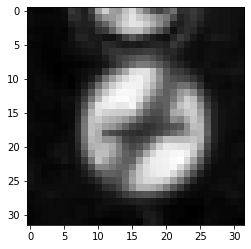

In [122]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

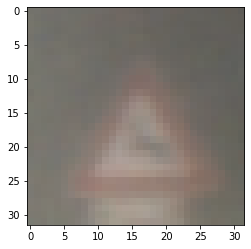

In [146]:
plt.imshow( X_train[400] )

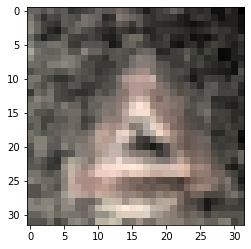

In [147]:
plt.imshow( preproc_img(X_train[400]) )